<a href="https://colab.research.google.com/github/Chizi-P/Train-Yolo-with-CCPD-data/blob/master/CCPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r sample_data

連結 google drive：

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/
!gdown --id 1m8w1kFxnCEiqz_-t2vTcgrgqNIv986PR

/content
Downloading...
From: https://drive.google.com/uc?id=1m8w1kFxnCEiqz_-t2vTcgrgqNIv986PR
To: /content/CCPD2020.zip
908MB [00:10, 82.7MB/s]


In [ ]:
!unzip ccpd_base.zip -d /content/

下載 CCPD2019：

In [ ]:
!gdown --id 1rdEsCUcIUaYOVRkx5IMTRNA7PcGMmSgc

Downloading...
From: https://drive.google.com/uc?id=1rdEsCUcIUaYOVRkx5IMTRNA7PcGMmSgc
To: /content/CCPD2019.tar.xz
13.2GB [04:57, 44.3MB/s]


刪除CCPD2020壓縮檔

In [ ]:
!rm -r CCPD2020.zip

解壓 CCPD2019：

In [ ]:
%cd /content/
!tar -Jxvf /content/gdrive/MyDrive/CCPD2019.tar.xz CCPD2019/ccpd_base -C /content/

串流輸出內容已截斷至最後 5000 行。
CCPD2019/ccpd_base/0211877394636-89_97-231&547_472&646-453&628_242&638_258&553_469&543-0_0_28_28_32_25_26-81-109.jpg
CCPD2019/ccpd_base/0291403256705-91_84-176&381_499&479-507&483_188&476_180&380_499&387-0_0_10_26_13_33_24-136-26.jpg
CCPD2019/ccpd_base/0274185823755-98_78-125&443_360&555-364&567_126&520_116&433_354&480-0_0_7_33_0_25_27-94-44.jpg
CCPD2019/ccpd_base/0168965517241-94_86-265&506_471&599-470&597_267&574_264&505_467&528-0_0_30_0_24_28_24-127-49.jpg
CCPD2019/ccpd_base/0171312260536-96_66-223&477_440&556-443&564_241&539_212&466_414&491-0_0_24_23_29_29_24-63-13.jpg
CCPD2019/ccpd_base/0259518678161-94_80-208&487_473&579-475&594_207&562_204&474_472&506-0_0_0_23_27_27_27-80-12.jpg
CCPD2019/ccpd_base/0177418582376-89_87-254&442_515&525-530&522_261&530_246&452_515&444-0_0_3_29_26_29_0-114-51.jpg
CCPD2019/ccpd_base/0201149425288-92_85-179&568_439&647-451&651_194&638_179&561_436&574-0_0_27_26_30_17_26-103-61.jpg
CCPD2019/ccpd_base/0138888888889-90_90-232&624_459&7

刪除CCPD2019壓縮檔

In [ ]:
!rm CCPD2019.tar.xz

生成 yolo 標注文件

In [ ]:
from os import listdir
from os.path import isfile, join

licensePlateLabel = 0
imgW = 720
imgH = 1160
test = "025-95_113-154&383_386&473-386&473_177&454_154&383_363&402-0_0_22_27_27_33_16-37-15.jpg"

# [area, tiltDegree, boundingBoxCoordinates, fourVerticesLocations, licensePlateNumber, brightness, blurriness]
def analyzeFileName(fileName):
  return list(map(lambda e: e.split('_'), fileName.split('-')))

def analyzeBoundingBoxCoordinates(boundingBoxCoordinates):
  return list(map(lambda e: [int(a) for a in e], [p.split('&') for p in boundingBoxCoordinates]))

def txt(fileName):
  boundingBoxCoordinates = analyzeFileName(fileName)[2]
  p = analyzeBoundingBoxCoordinates(boundingBoxCoordinates)
  w = p[1][0] - p[0][0]
  h = p[1][1] - p[0][1]
  x = p[0][0] + w / 2
  y = p[0][1] + h / 2
  return "{} {} {} {} {}".format(licensePlateLabel, x / imgW, y / imgH, w / imgW, h / imgH)

split_base = [f for f in listdir("/content/CCPD2019/ccpd_base") if isfile(join("/content/CCPD2019/ccpd_base", f))]
with open("/content/CCPD2019/train.txt", "w") as trainFile:
  for line in split_base:
    if line.lower().endswith(".jpg"):
      trainFile.write("/content/CCPD2019/ccpd_base/{}\n".format(line))
for filename in split_base:
  filename = filename.replace(".jpg", "")
  with open("/content/CCPD2019/ccpd_base/{}.txt".format(filename), "w") as f:
    f.write(txt(filename))
    print("Written /content/CCPD2019/ccpd_base/{}.txt".format(filename))


串流輸出內容已截斷至最後 5000 行。
Written /content/CCPD2019/ccpd_base/0194971264367-90_87-275&330_518&410-519&406_278&411_279&331_520&326-0_0_33_30_31_10_32-118-38.txt
Written /content/CCPD2019/ccpd_base/015001197318-94_76-270&444_466&527-474&529_276&516_255&441_453&454-0_0_22_30_23_27_29-106-28.txt
Written /content/CCPD2019/ccpd_base/0291594827586-97_73-152&386_420&503-437&517_165&475_142&384_414&426-0_0_8_9_25_25_30-129-104.txt
Written /content/CCPD2019/ccpd_base/0139870689655-89_91-290&528_485&608-485&596_294&604_297&530_488&522-0_0_25_27_3_25_27-121-28.txt
Written /content/CCPD2019/ccpd_base/031405651341-90_89-64&502_403&598-406&599_64&617_57&506_399&488-0_0_10_31_23_25_30-77-71.txt
Written /content/CCPD2019/ccpd_base/0193318965517-89_93-211&540_447&635-438&617_209&635_217&541_446&523-0_0_16_9_32_27_27-132-82.txt
Written /content/CCPD2019/ccpd_base/0187068965517-90_84-205&560_479&630-469&645_215&644_202&558_456&559-5_2_25_24_33_25_3-107-62.txt
Written /content/CCPD2019/ccpd_base/0320043103448-8

檢查 Cuda 版本

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


下載 darknet

In [ ]:
%cd /content/
!git clone https://github.com/AlexeyAB/darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15232, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 15232 (delta 21), reused 33 (delta 20), pack-reused 15185
Receiving objects: 100% (15232/15232), 13.66 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (10331/10331), done.


修改 Makefile

In [ ]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile


/content/darknet


編譯

In [ ]:
%cd /content/darknet/
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (itera

給予權限：

In [ ]:
%cd /content/darknet
!chmod +x ./darknet

/content/darknet


下載預訓練模型：

In [ ]:
%cd /content/
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content
--2021-07-12 08:23:59--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  8.60MB/s    in 20s     

2021-07-12 08:24:19 (7.90 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



訓練：

In [ ]:
%cd /content/darknet
!./darknet detector train /content/gdrive/MyDrive/LP/lp.data /content/gdrive/MyDrive/LP/lp.cfg /content/gdrive/MyDrive/backup/lp_last.weights -dont_show -gpus 0 | grep "avg loss"

串流輸出內容已截斷至最後 5000 行。
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.790682), count: 2, class_loss = 0.355691, iou_loss = 0.103279, total_loss = 0.458970 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
 total_bbox = 49351, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.824778), count: 2, class_loss = 0.000649, iou_loss = 0.028293, total_loss = 0.028942 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.862316), count: 2, class_loss = 0.131526, iou_loss = 0.028062, total_loss = 0.159588 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 49355, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75,

windows txt 轉 linux txt 格式：

In [ ]:
!sudo apt install dos2unix

In [ ]:
!dos2unix -o /content/gdrive/MyDrive/LP/CCPD2019/splits/train.txt /content/gdrive/MyDrive/LP/CCPD2019/splits/val.txt

使用模型

/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version:  CUDNN_HALF=1 
3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1

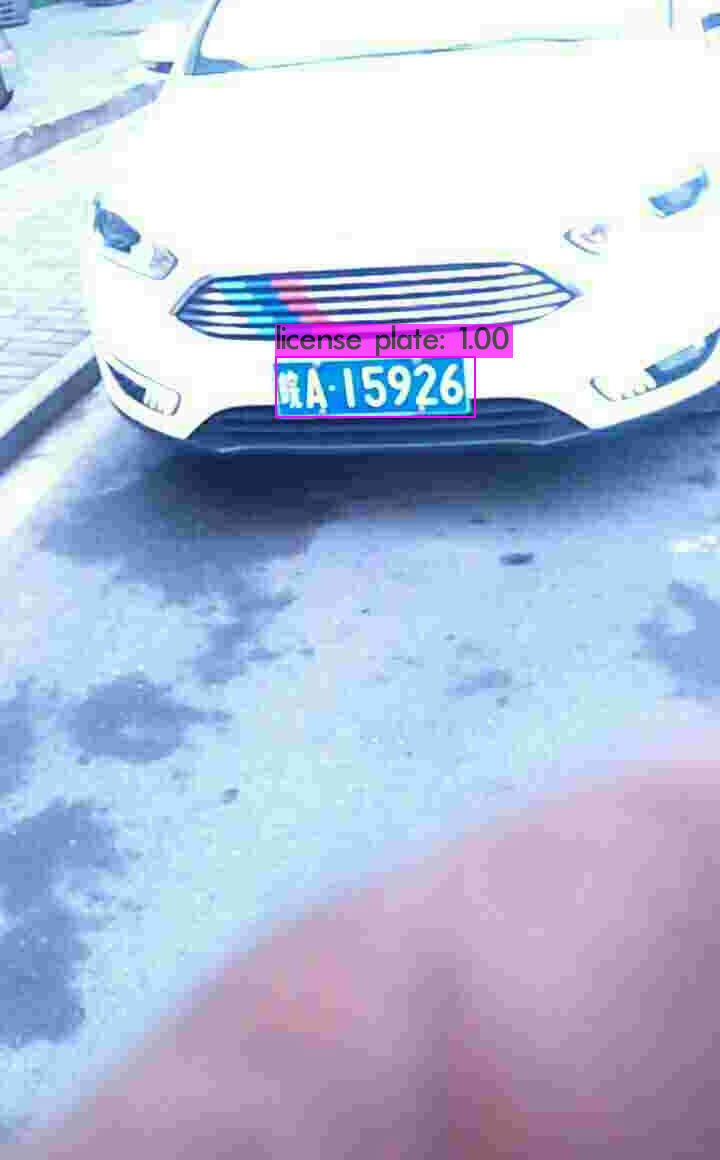

In [ ]:
%cd /content/darknet
!./darknet detector test /content/gdrive/MyDrive/LP/lp.data /content/gdrive/MyDrive/LP/lp.cfg /content/gdrive/MyDrive/backup/lp_last.weights /content/gdrive/MyDrive/LP/detectImage/6.jpg -thresh 0.25 | tee /content/lp.txt

from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/darknet/predictions.jpg')
cv2_imshow(img)